Self-Organizing Maps

In [1]:
import sys
sys.path.append('../')

from Functions.pre_processing_functions import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom
import umap

plt.rcParams['figure.figsize'] = [16, 8]
font = {'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)


pd.set_option("display.max_columns", None)

import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

In [2]:
df = preprocess('../Data/customer_info.csv')

In [3]:
df

,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,children,has_children,years_active,customer_educlevel
0,0.857491,1.0,0.630563,1.397552,0.222322,0.697021,-0.746487,0.522554,-0.041784,-0.020744,1.722374,0.645627,1.283570,1.653426,-0.528771,0.045796,0.731051,2.001326,-0.593063,0.723820,0.0,-1.210321,1.280767,-0.070215,1.051988,1.0,-0.723820,0.0
1,-1.143391,0.0,-0.905212,0.068829,-1.091845,0.697021,-0.702610,-1.013639,0.175332,0.077053,-1.336102,-1.247776,-0.322993,-0.737079,-0.659574,-1.005888,-0.613592,-0.702951,2.884634,-0.331756,1.0,-0.613020,-0.272805,1.494486,-0.635180,1.0,0.331756,1.0
2,1.681577,1.0,0.630563,2.726275,-1.091845,2.650039,-0.349558,0.156583,0.175332,1.252090,1.786389,1.770743,0.768045,1.772334,0.432525,-0.194500,-0.839918,1.422455,-0.778935,-0.753986,0.0,1.823421,0.400001,-1.020212,1.614377,1.0,0.753986,0.0
3,0.132769,0.0,-0.905212,-1.259894,0.222322,-1.255998,-0.459506,3.493649,0.175332,-1.055014,-0.742188,1.741718,0.048185,-0.059151,-1.189013,0.879029,-0.320699,0.575749,-0.263877,-1.176217,0.0,-0.281029,-0.116103,-0.293744,-1.197569,0.0,1.176217,0.0
4,-0.312294,0.0,-0.137325,0.068829,0.222322,1.348027,1.359075,-0.140940,0.175332,-0.714209,0.883072,-0.491439,0.130669,1.032636,0.694130,-0.890421,-1.159437,0.774466,-0.075609,-0.542871,1.0,1.767441,0.312330,0.265078,-0.072791,1.0,0.542871,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,1.475577,1.0,-0.137325,0.068829,-1.091845,-0.604992,2.022875,0.425679,0.609564,0.108170,0.178911,1.176600,-0.424223,1.333765,0.698283,-0.057188,-0.400579,0.074637,-0.581383,0.723820,0.0,0.136865,2.169032,-1.579034,-0.072791,1.0,-0.723820,0.0
34056,0.640412,0.0,-0.137325,0.068829,-1.091845,0.046015,-0.325233,0.024381,-0.041784,-0.352659,0.961312,-0.240465,0.537465,-0.394254,0.492736,-0.419192,0.005476,1.940847,0.888374,0.934935,1.0,-0.132187,-0.503196,-0.740801,-0.072791,1.0,-0.934935,0.0
34057,1.689280,1.0,-0.137325,-1.259894,0.222322,-0.604992,-0.399022,1.401049,0.826680,-0.500835,-0.767083,-0.598999,-0.757908,1.001751,-0.713556,1.269119,-1.385763,0.636228,0.632830,0.723820,0.0,0.927384,-0.634021,-1.634916,-0.635180,1.0,-0.723820,0.0
34058,-0.143340,1.0,-0.137325,0.068829,0.222322,0.697021,0.758298,0.274433,-0.910248,-0.807560,0.025987,-0.540951,0.595579,0.124615,0.781332,0.011468,0.384905,-0.029042,0.305589,0.090474,1.0,-0.715467,0.028836,0.544489,-0.072791,1.0,-0.090474,1.0


In [4]:
features = ['lifetime_spend_groceries', 'lifetime_spend_electronics',
       'typical_hour', 'lifetime_spend_vegetables',
       'lifetime_spend_nonalcohol_drinks', 'lifetime_spend_alcohol_drinks',
       'lifetime_spend_meat', 'lifetime_spend_fish', 'lifetime_spend_hygiene',
       'lifetime_spend_videogames', 'lifetime_spend_petfood',
       'lifetime_total_distinct_products']


In [5]:
#distance map

#plt.pcolor(som.distance_map().T, cmap='bone_r')
#plt.colorbar()

In [6]:

def train_som_cluster(df, features, som_size=3, iterations=5000, sigma=1.0, learning_rate=0.5):
   
    df = df.copy()
    
    # 1. Extract features
    X = df[features].values

    # 2. Initialize and train SOM
    som = MiniSom(x=som_size,
                  y=som_size, 
                  input_len=X.shape[1], 
                  sigma=sigma, 
                  learning_rate=learning_rate)
    
    np.random.seed(42)
    som.random_weights_init(X)
    som.train(X, num_iteration=iterations, verbose=True)

    # 3. Assign cluster to each data point
    df['som_cluster'] = ([som.winner(X[i]) for i in range(0, len(X))])

    plt.pcolor(som.distance_map().T, cmap='bone_r')
    plt.colorbar()

    return df


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 1.6352320919188252


,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,children,has_children,years_active,customer_educlevel,som_cluster
0,0.857491,1.0,0.630563,1.397552,0.222322,0.697021,-0.746487,0.522554,-0.041784,-0.020744,1.722374,0.645627,1.283570,1.653426,-0.528771,0.045796,0.731051,2.001326,-0.593063,0.723820,0.0,-1.210321,1.280767,-0.070215,1.051988,1.0,-0.723820,0.0,"(1, 1)"
1,-1.143391,0.0,-0.905212,0.068829,-1.091845,0.697021,-0.702610,-1.013639,0.175332,0.077053,-1.336102,-1.247776,-0.322993,-0.737079,-0.659574,-1.005888,-0.613592,-0.702951,2.884634,-0.331756,1.0,-0.613020,-0.272805,1.494486,-0.635180,1.0,0.331756,1.0,"(5, 4)"
2,1.681577,1.0,0.630563,2.726275,-1.091845,2.650039,-0.349558,0.156583,0.175332,1.252090,1.786389,1.770743,0.768045,1.772334,0.432525,-0.194500,-0.839918,1.422455,-0.778935,-0.753986,0.0,1.823421,0.400001,-1.020212,1.614377,1.0,0.753986,0.0,"(0, 3)"
3,0.132769,0.0,-0.905212,-1.259894,0.222322,-1.255998,-0.459506,3.493649,0.175332,-1.055014,-0.742188,1.741718,0.048185,-0.059151,-1.189013,0.879029,-0.320699,0.575749,-0.263877,-1.176217,0.0,-0.281029,-0.116103,-0.293744,-1.197569,0.0,1.176217,0.0,"(7, 9)"
4,-0.312294,0.0,-0.137325,0.068829,0.222322,1.348027,1.359075,-0.140940,0.175332,-0.714209,0.883072,-0.491439,0.130669,1.032636,0.694130,-0.890421,-1.159437,0.774466,-0.075609,-0.542871,1.0,1.767441,0.312330,0.265078,-0.072791,1.0,0.542871,1.0,"(8, 3)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,1.475577,1.0,-0.137325,0.068829,-1.091845,-0.604992,2.022875,0.425679,0.609564,0.108170,0.178911,1.176600,-0.424223,1.333765,0.698283,-0.057188,-0.400579,0.074637,-0.581383,0.723820,0.0,0.136865,2.169032,-1.579034,-0.072791,1.0,-0.723820,0.0,"(9, 3)"
34056,0.640412,0.0,-0.137325,0.068829,-1.091845,0.046015,-0.325233,0.024381,-0.041784,-0.352659,0.961312,-0.240465,0.537465,-0.394254,0.492736,-0.419192,0.005476,1.940847,0.888374,0.934935,1.0,-0.132187,-0.503196,-0.740801,-0.072791,1.0,-0.934935,0.0,"(1, 3)"
34057,1.689280,1.0,-0.137325,-1.259894,0.222322,-0.604992,-0.399022,1.401049,0.826680,-0.500835,-0.767083,-0.598999,-0.757908,1.001751,-0.713556,1.269119,-1.385763,0.636228,0.632830,0.723820,0.0,0.927384,-0.634021,-1.634916,-0.635180,1.0,-0.723820,0.0,"(2, 5)"
34058,-0.143340,1.0,-0.137325,0.068829,0.222322,0.697021,0.758298,0.274433,-0.910248,-0.807560,0.025987,-0.540951,0.595579,0.124615,0.781332,0.011468,0.384905,-0.029042,0.305589,0.090474,1.0,-0.715467,0.028836,0.544489,-0.072791,1.0,-0.090474,1.0,"(2, 4)"


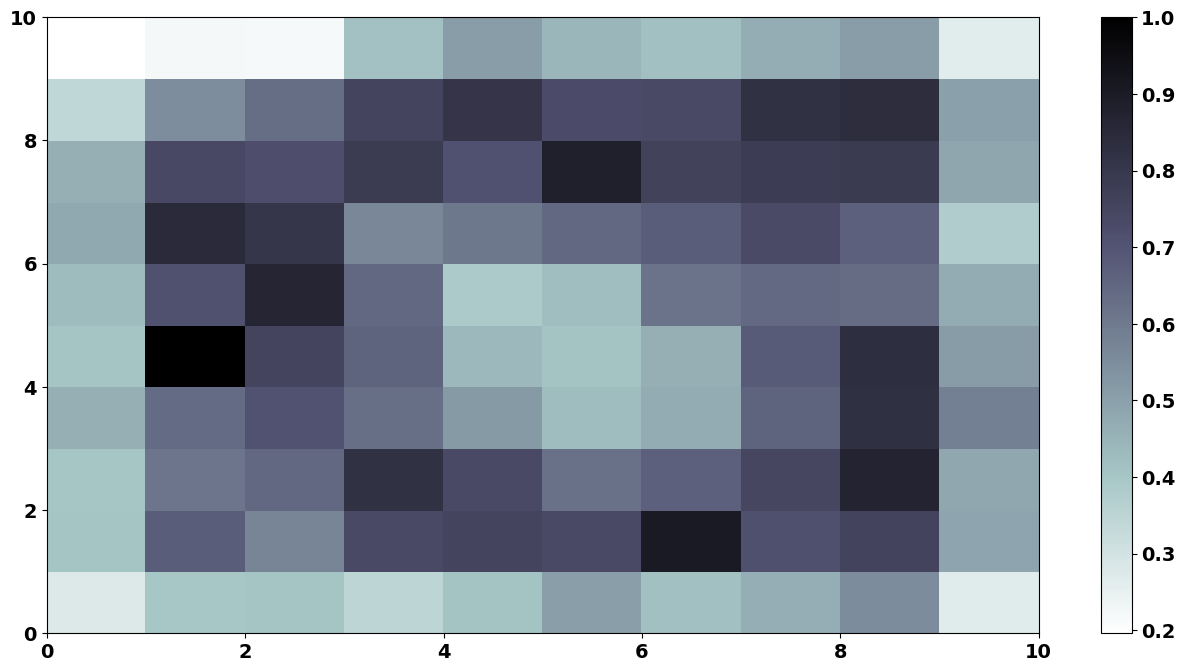

In [7]:
train_som_cluster(df, features, som_size=10, iterations=5000, sigma=1.0, learning_rate=0.5)


 [ 5000 / 5000 ] 100% - 0:00:00 left 
 quantization error: 2.1963411316177255


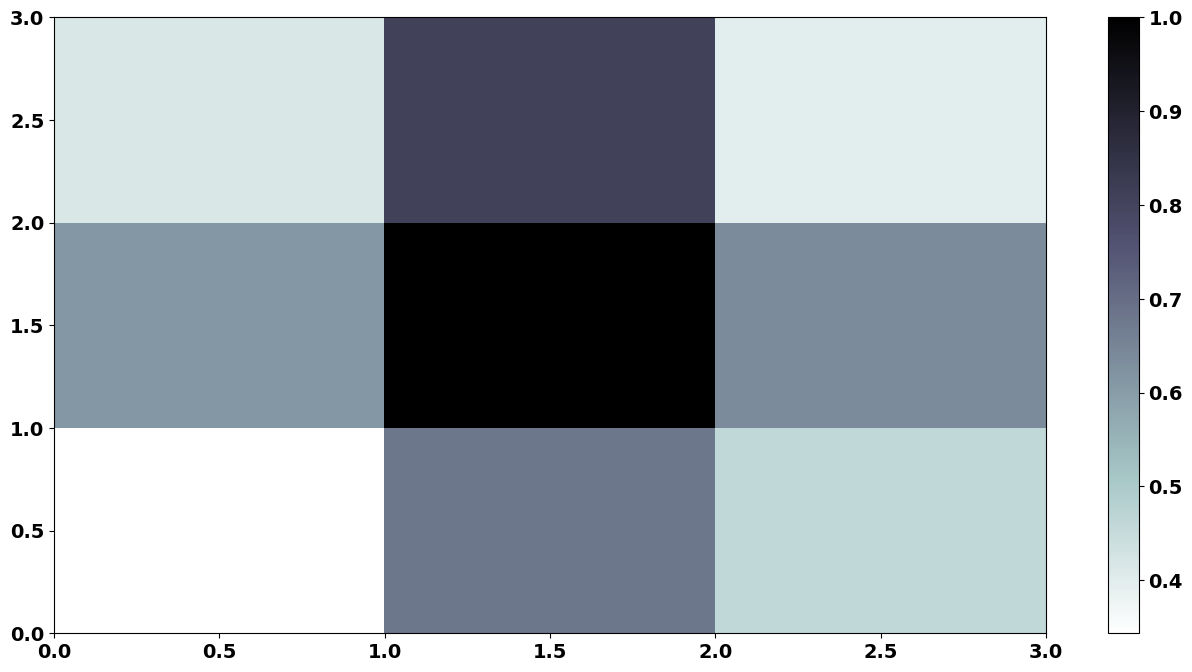

In [8]:
df = train_som_cluster(df, features, som_size=3, iterations=5000, sigma=1.0, learning_rate=0.5)

In [9]:
df

,customer_id,customer_gender,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,lifetime_spend_nonalcohol_drinks,lifetime_spend_alcohol_drinks,lifetime_spend_meat,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,loyalty_card_number,latitude,longitude,customer_age,children,has_children,years_active,customer_educlevel,som_cluster
0,0.857491,1.0,0.630563,1.397552,0.222322,0.697021,-0.746487,0.522554,-0.041784,-0.020744,1.722374,0.645627,1.283570,1.653426,-0.528771,0.045796,0.731051,2.001326,-0.593063,0.723820,0.0,-1.210321,1.280767,-0.070215,1.051988,1.0,-0.723820,0.0,"(0, 1)"
1,-1.143391,0.0,-0.905212,0.068829,-1.091845,0.697021,-0.702610,-1.013639,0.175332,0.077053,-1.336102,-1.247776,-0.322993,-0.737079,-0.659574,-1.005888,-0.613592,-0.702951,2.884634,-0.331756,1.0,-0.613020,-0.272805,1.494486,-0.635180,1.0,0.331756,1.0,"(2, 1)"
2,1.681577,1.0,0.630563,2.726275,-1.091845,2.650039,-0.349558,0.156583,0.175332,1.252090,1.786389,1.770743,0.768045,1.772334,0.432525,-0.194500,-0.839918,1.422455,-0.778935,-0.753986,0.0,1.823421,0.400001,-1.020212,1.614377,1.0,0.753986,0.0,"(0, 1)"
3,0.132769,0.0,-0.905212,-1.259894,0.222322,-1.255998,-0.459506,3.493649,0.175332,-1.055014,-0.742188,1.741718,0.048185,-0.059151,-1.189013,0.879029,-0.320699,0.575749,-0.263877,-1.176217,0.0,-0.281029,-0.116103,-0.293744,-1.197569,0.0,1.176217,0.0,"(1, 2)"
4,-0.312294,0.0,-0.137325,0.068829,0.222322,1.348027,1.359075,-0.140940,0.175332,-0.714209,0.883072,-0.491439,0.130669,1.032636,0.694130,-0.890421,-1.159437,0.774466,-0.075609,-0.542871,1.0,1.767441,0.312330,0.265078,-0.072791,1.0,0.542871,1.0,"(1, 1)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34055,1.475577,1.0,-0.137325,0.068829,-1.091845,-0.604992,2.022875,0.425679,0.609564,0.108170,0.178911,1.176600,-0.424223,1.333765,0.698283,-0.057188,-0.400579,0.074637,-0.581383,0.723820,0.0,0.136865,2.169032,-1.579034,-0.072791,1.0,-0.723820,0.0,"(0, 2)"
34056,0.640412,0.0,-0.137325,0.068829,-1.091845,0.046015,-0.325233,0.024381,-0.041784,-0.352659,0.961312,-0.240465,0.537465,-0.394254,0.492736,-0.419192,0.005476,1.940847,0.888374,0.934935,1.0,-0.132187,-0.503196,-0.740801,-0.072791,1.0,-0.934935,0.0,"(1, 1)"
34057,1.689280,1.0,-0.137325,-1.259894,0.222322,-0.604992,-0.399022,1.401049,0.826680,-0.500835,-0.767083,-0.598999,-0.757908,1.001751,-0.713556,1.269119,-1.385763,0.636228,0.632830,0.723820,0.0,0.927384,-0.634021,-1.634916,-0.635180,1.0,-0.723820,0.0,"(1, 2)"
34058,-0.143340,1.0,-0.137325,0.068829,0.222322,0.697021,0.758298,0.274433,-0.910248,-0.807560,0.025987,-0.540951,0.595579,0.124615,0.781332,0.011468,0.384905,-0.029042,0.305589,0.090474,1.0,-0.715467,0.028836,0.544489,-0.072791,1.0,-0.090474,1.0,"(1, 1)"


/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/sklearn/utils/deprecation.py:132: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/constancasa/anaconda3/envs/MACHINE_LEARNING/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


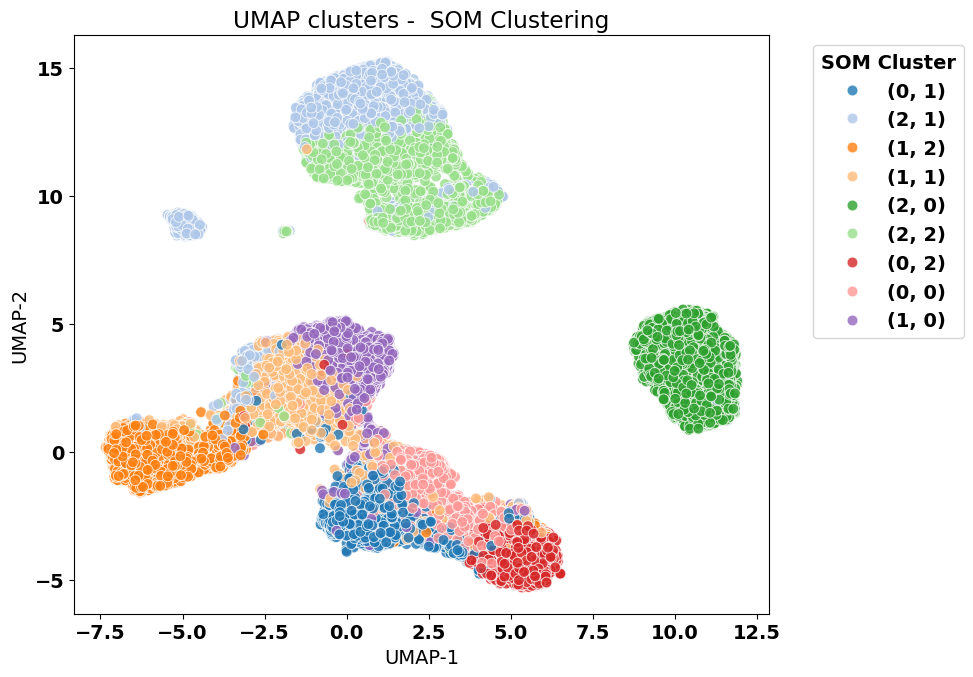

In [10]:
 # Fit UMAP
umap_object = umap.UMAP(n_neighbors=5, random_state=2)
umap_embedding = umap_object.fit_transform(df[features])

df['umap_1'] = umap_embedding[:, 0]
df['umap_2'] = umap_embedding[:, 1]
## Plot UMAP colored by SOM clusters
plt.figure(figsize=(10, 7))
sns.scatterplot(x='umap_1', y='umap_2', data=df, hue=df['som_cluster'].astype(str),
                palette='tab20', s=60, alpha=0.8)
plt.title("UMAP clusters -  SOM Clustering")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='SOM Cluster')
plt.tight_layout()
plt.show()


In [11]:
df.groupby('som_cluster').size().sort_values()

som_cluster
(0, 0)    2682
(0, 2)    2705
(1, 0)    3152
(1, 2)    3501
(0, 1)    3691
(1, 1)    3810
(2, 1)    4549
(2, 0)    4557
(2, 2)    4889
dtype: int64